The idea is to display each image in a class folder, and ask if it belongs in there. The filenames of images that don't belong is put in a list, and every file on that list is deleted.

In [4]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [5]:
from fastai import *
from fastai.vision import *

In [10]:
path = Path('/Users/WayNoxchi/data/aircraft')

In [14]:
ignores = ['backup','models']

In [15]:
class_folders = [f for f in path.iterdir() if f.is_dir() and f.name not in ignores]

In [16]:
class_folders

[PosixPath('/Users/WayNoxchi/data/aircraft/f16'),
 PosixPath('/Users/WayNoxchi/data/aircraft/su24'),
 PosixPath('/Users/WayNoxchi/data/aircraft/mig29'),
 PosixPath('/Users/WayNoxchi/data/aircraft/su22'),
 PosixPath('/Users/WayNoxchi/data/aircraft/su25'),
 PosixPath('/Users/WayNoxchi/data/aircraft/mig21'),
 PosixPath('/Users/WayNoxchi/data/aircraft/fa18ef'),
 PosixPath('/Users/WayNoxchi/data/aircraft/f4'),
 PosixPath('/Users/WayNoxchi/data/aircraft/a10'),
 PosixPath('/Users/WayNoxchi/data/aircraft/cargo'),
 PosixPath('/Users/WayNoxchi/data/aircraft/f15e'),
 PosixPath('/Users/WayNoxchi/data/aircraft/fighters'),
 PosixPath('/Users/WayNoxchi/data/aircraft/f15c'),
 PosixPath('/Users/WayNoxchi/data/aircraft/typhoon'),
 PosixPath('/Users/WayNoxchi/data/aircraft/fa18c'),
 PosixPath('/Users/WayNoxchi/data/aircraft/f35'),
 PosixPath('/Users/WayNoxchi/data/aircraft/su30'),
 PosixPath('/Users/WayNoxchi/data/aircraft/su27'),
 PosixPath('/Users/WayNoxchi/data/aircraft/tornado'),
 PosixPath('/Users/W

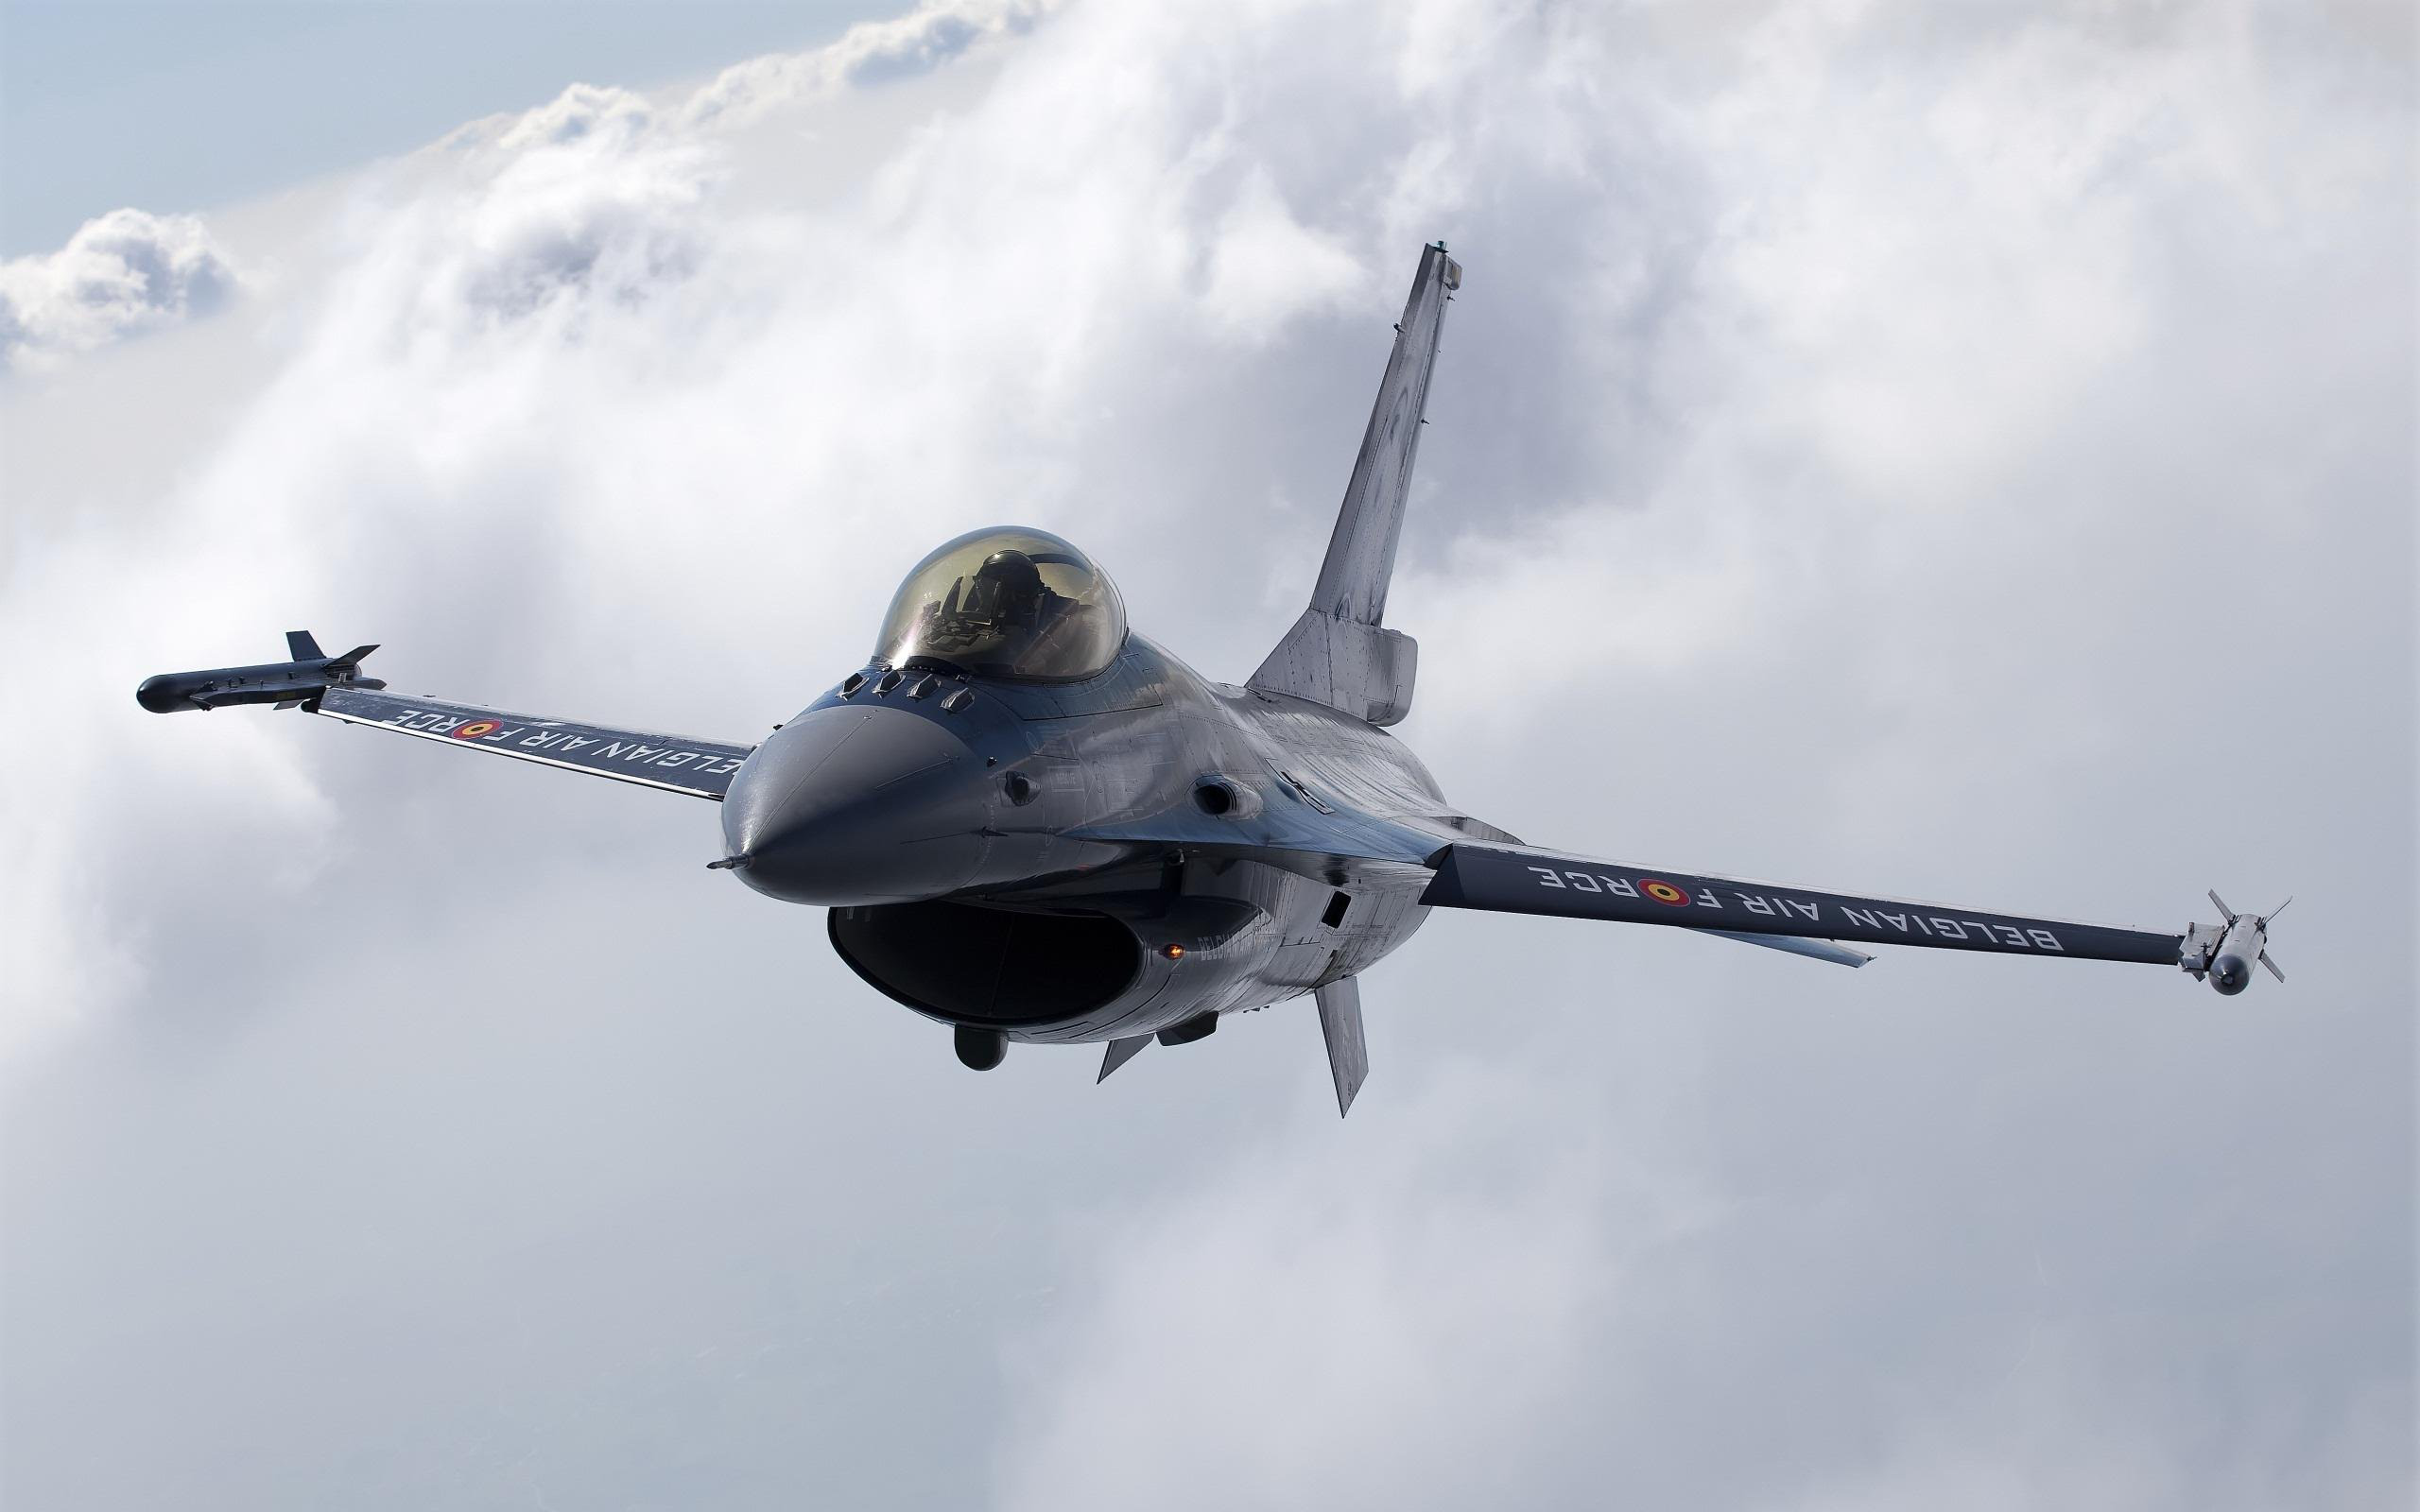

In [20]:
open_image(class_folders[0]/'00000000.jpg')

In [58]:
doc(open_image)

open_image [source] open_image ( fn : PathOrStr ) → Image 
 
 Return Image object created from image in file fn . 
 Show in docs

In [63]:
img = open_image(class_folders[0]/'00000000.jpg')

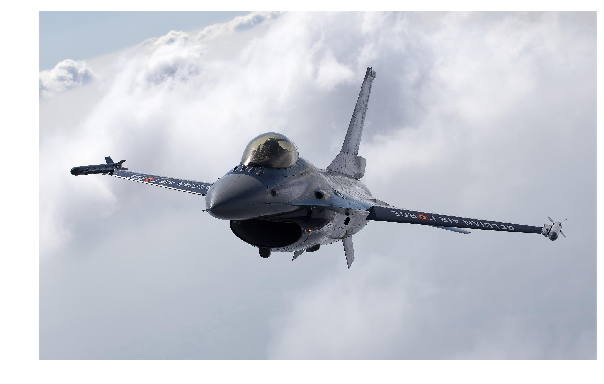

In [71]:
img.show(figsize=(10,10))

In [96]:
print('eeeyyyy')
sleep(1)
print('its me')

eeeyyyy
its me


In [94]:
from time import sleep

In [143]:
import PIL.Image

In [169]:
def class_folder_check(class_folder_path):
    assert class_folder_path.is_dir()

    class_folder = class_folder_path.name
    remove_list  = []

    # build list of files
    fnames = [f for f in class_folder_path.iterdir() if f.is_file()]

    # show images
    for f in fnames:
        print(f'open: {class_folder/f}')
#         show_image(open_image(class_folder_path/f)) ## fastai way
#         img = open_image(class_folder_path/f)
#         img.show()
        plt.imshow(np.rollaxis((np.array(open_image(class_folder/f).data) * 255).astype(np.int32), 0, 3)) ## PyPlot(NumPy(fastai)) way
#         img = PIL.Image.open(class_folder_path/f) ## PIL way (open)
#         img.show()
        inpt = '0'

        while not inpt.isalpha() or (inpt[0].lower() not in ['y','n','q']):
            inpt = input(f"Does this belong in {class_folder}? (y/n/q:quit): ")
        inpt = str(inpt[0]).lower()

        if inpt == 'y':
            remove_list.append(f)
            print(f"{f} added to removals list.")
        elif inpt == 'n':
            pass
        else:
            break

#         img.close()

    return remove_list

In [135]:
class_folder_check(class_folders[0])

open: /Users/WayNoxchi/data/aircraft/f16/00000400.jpg


TypeError: unsupported operand type(s) for *: 'Image' and 'int'

In [120]:
(np.array(img.data) * 255).astype(np.int32)

array([[[183, 182, 182, 182, ..., 205, 206, 207, 207],
        [183, 182, 182, 182, ..., 205, 206, 207, 207],
        [182, 182, 182, 181, ..., 205, 206, 206, 207],
        [182, 182, 182, 181, ..., 205, 206, 206, 206],
        ...,
        [187, 187, 186, 186, ..., 183, 184, 185, 185],
        [187, 187, 186, 186, ..., 183, 184, 185, 185],
        [187, 187, 186, 186, ..., 183, 184, 185, 185],
        [187, 187, 186, 186, ..., 183, 184, 185, 185]],

       [[200, 199, 199, 199, ..., 204, 205, 206, 206],
        [200, 199, 199, 199, ..., 204, 205, 206, 206],
        [199, 199, 199, 198, ..., 204, 205, 205, 206],
        [199, 199, 199, 198, ..., 204, 205, 205, 205],
        ...,
        [193, 193, 192, 192, ..., 187, 188, 189, 189],
        [193, 193, 192, 192, ..., 187, 188, 189, 189],
        [193, 193, 192, 192, ..., 187, 188, 189, 189],
        [193, 193, 192, 192, ..., 187, 188, 189, 189]],

       [[218, 217, 217, 217, ..., 210, 211, 212, 212],
        [218, 217, 217, 217, ..., 2

In [122]:
(np.array(img.data) * 255).astype(np.int32).shape

(3, 1600, 2560)

In [126]:
np.rollaxis((np.array(img.data) * 255).astype(np.int32), 0, 3).shape

(1600, 2560, 3)

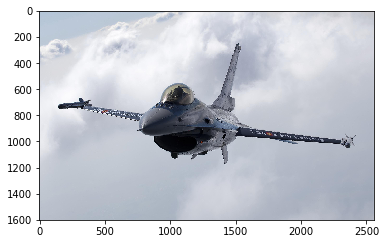

In [128]:
plt.imshow(np.rollaxis((np.array(img.data) * 255).astype(np.int32), 0, 3));

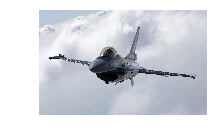

In [131]:
show_image(img);

open: /Users/WayNoxchi/data/aircraft/f16/00000400.jpg


Does this belong in f16? (y/n):  


IndexError: string index out of range

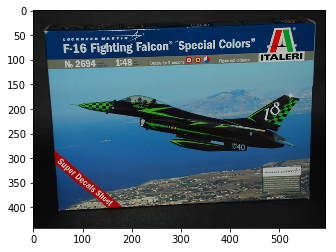

In [137]:
class_folder_check(class_folders[0])

In [140]:
import PIL.Image

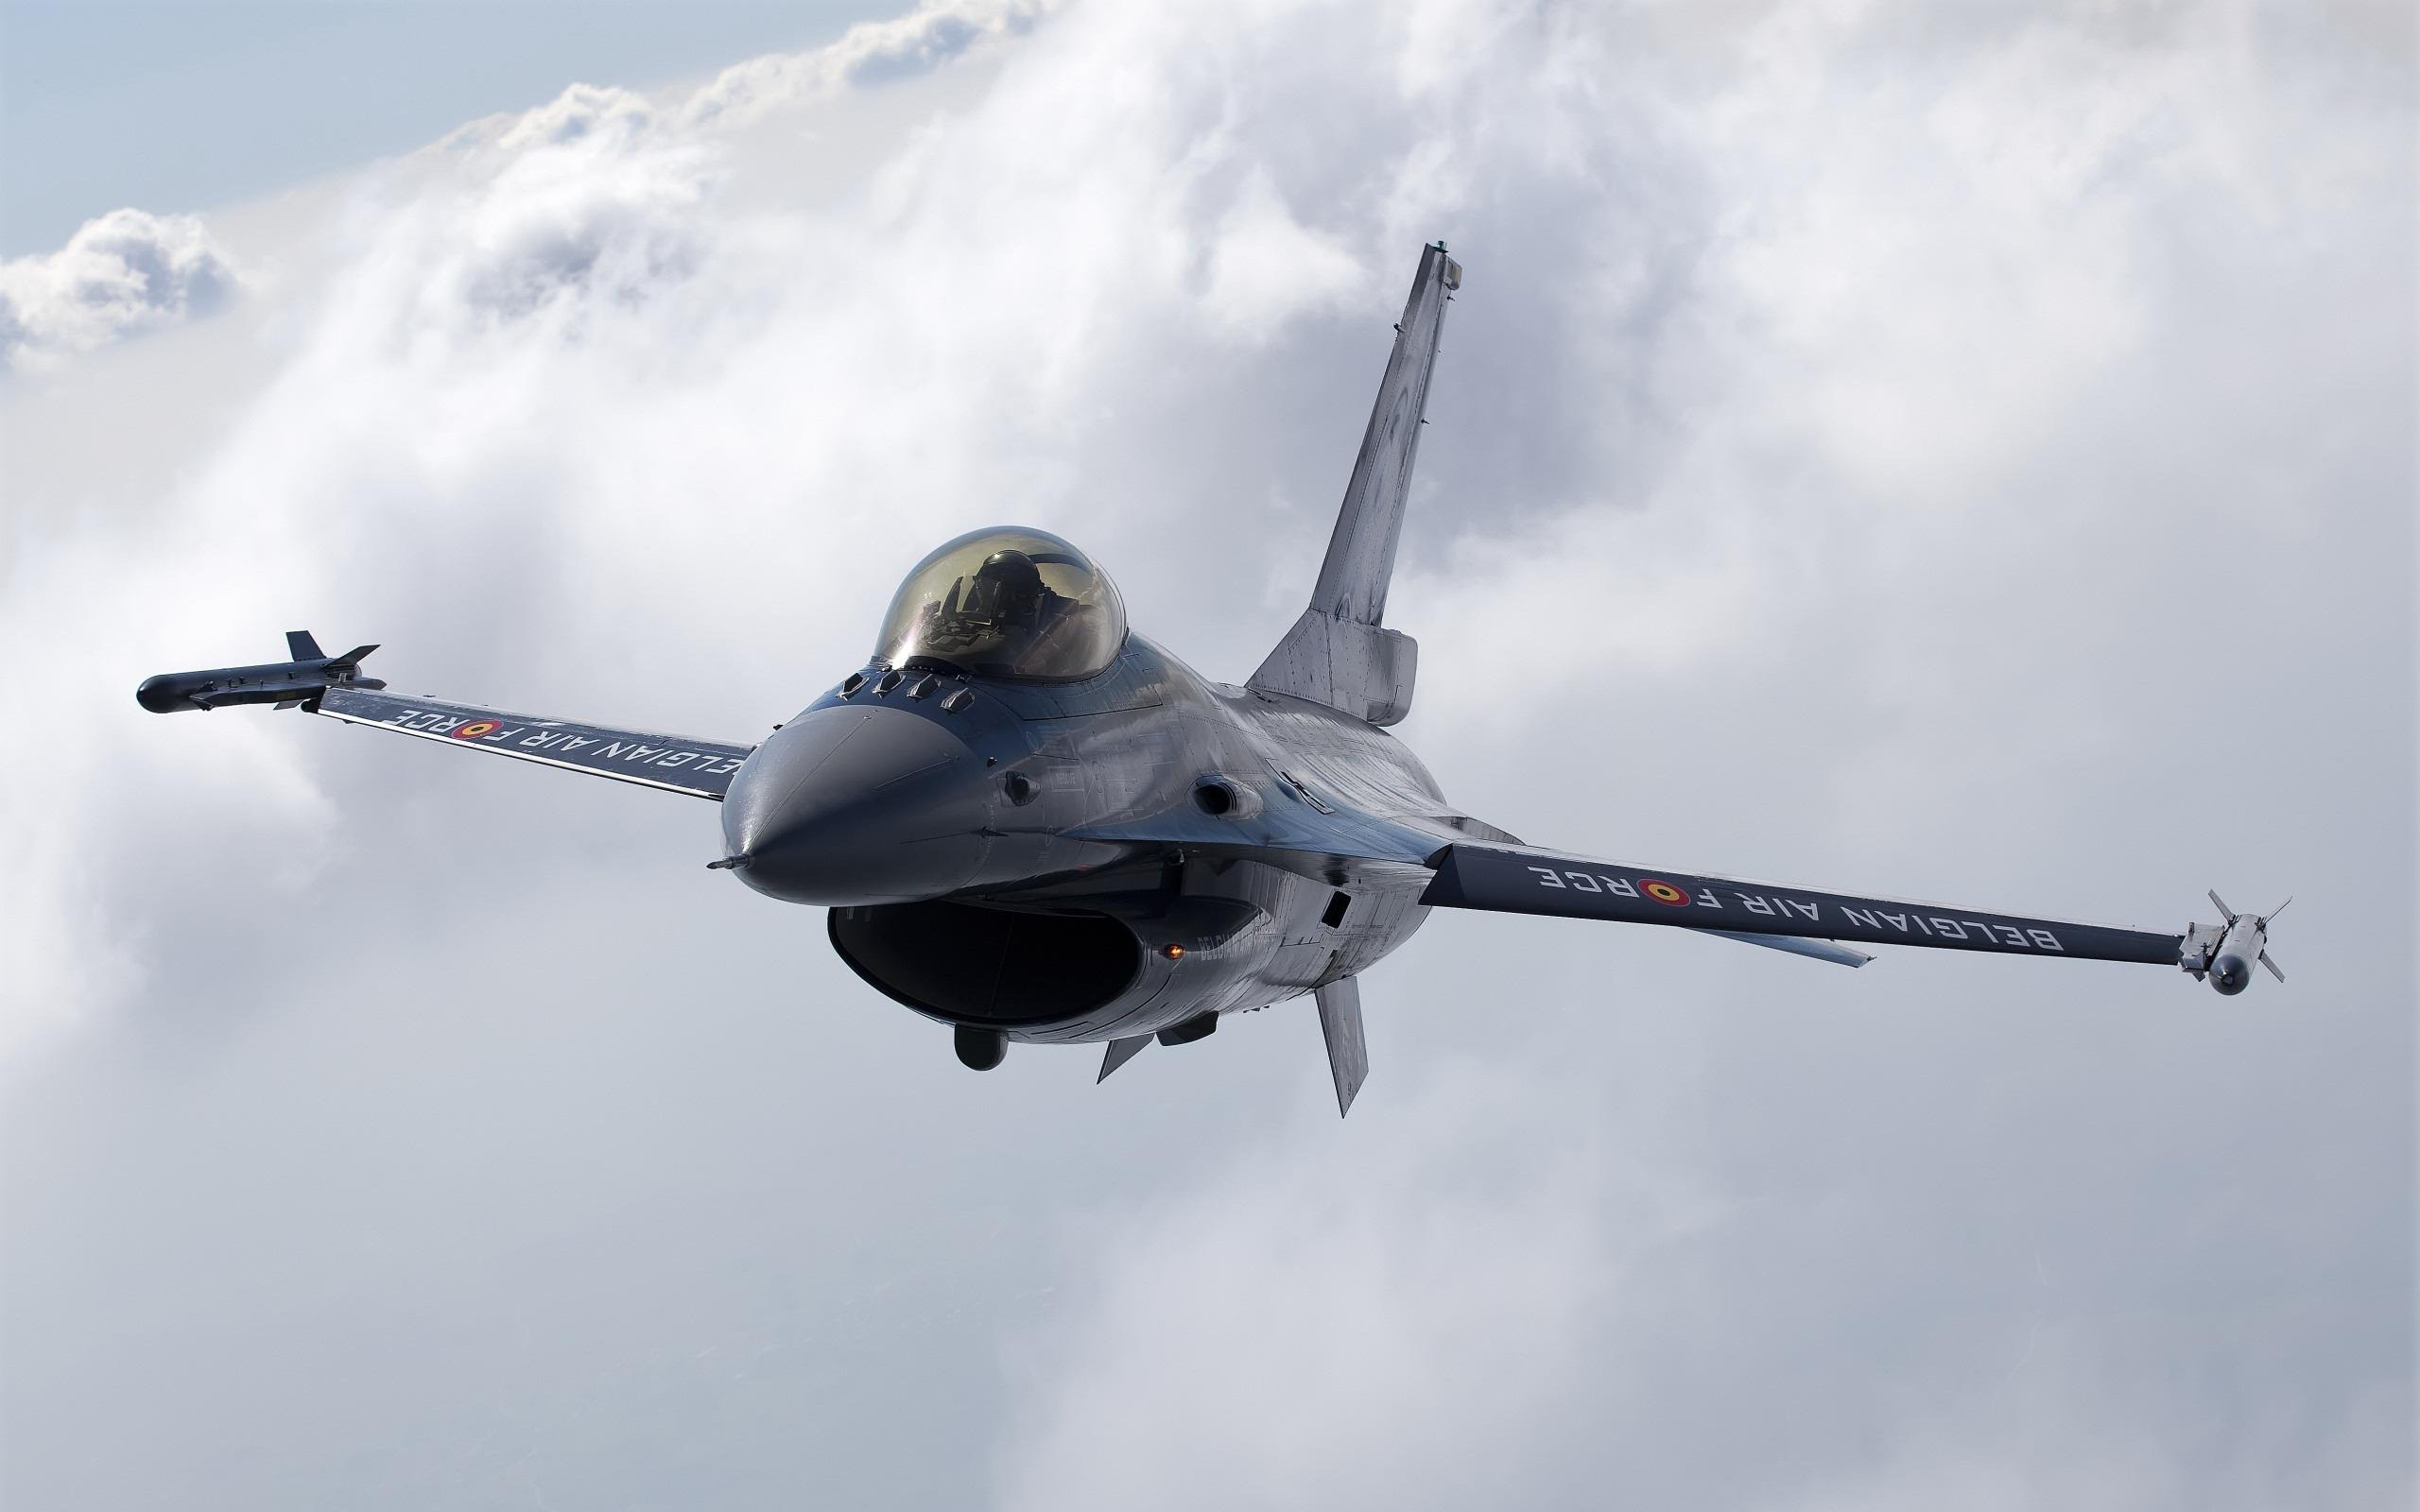

In [142]:
PIL.Image.open(class_folders[0]/'00000000.jpg')

open: /Users/WayNoxchi/data/aircraft/f16/00000400.jpg


Does this belong in f16? (y/n/q:quit):  q


[]

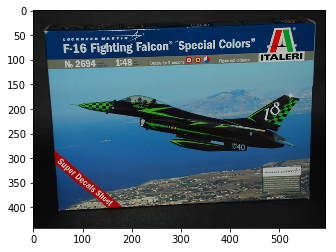

In [170]:
class_folder_check(class_folders[0])

In [158]:
PIL.__version__

'5.3.0'

In [165]:
img = open_image(class_folders[0]/'00000000.jpg')

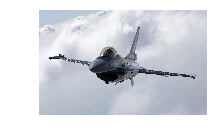

In [166]:
img.show()